In [1]:
!pip install jupyterlab_execute_time

  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.1/527.1 kB 13.0 MB/s  0:00:00
Using cached jsonpointer-3.0.0-py2.py3-none-any.whl (7.6 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [jupyterlab_execute_time]


In [19]:
!pip install torchinfo tqdm torch

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 56.7 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 71.0 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 62.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 25.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 60.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 68.5 MB

In [1]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [2]:
df = pd.read_csv('data/etf/jan2025/cleaned/soxs_cleaned_jan2025.csv', sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [3]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [4]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SOXS.K,2025-01-03 09:40:00.006514971-05:00,0.000939,0.02,21.300,21.29,800.0,21.31,2600.0,21.28,...,21.20,100.0,21.44,2300.0,0.000,-0.010,-0.010,0,0,0
1,SOXS.K,2025-01-03 09:40:00.016467552-05:00,0.000469,0.01,21.305,21.30,600.0,21.31,2600.0,21.29,...,21.21,100.0,21.44,2300.0,-0.005,-0.020,-0.010,0,1,0
2,SOXS.K,2025-01-03 09:40:00.076256984-05:00,0.000939,0.02,21.310,21.30,1100.0,21.32,1300.0,21.29,...,21.21,100.0,21.52,2300.0,-0.005,-0.020,-0.020,0,1,1
3,SOXS.K,2025-01-03 09:40:00.081235935-05:00,0.000469,0.01,21.315,21.31,600.0,21.32,1300.0,21.30,...,21.22,100.0,21.52,2300.0,-0.015,-0.030,-0.020,1,1,1
4,SOXS.K,2025-01-03 09:40:00.116134193-05:00,0.000939,0.02,21.310,21.30,800.0,21.32,3900.0,21.29,...,21.21,100.0,21.52,2300.0,-0.015,-0.020,-0.015,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960700,SOXS.K,2025-01-31 15:49:23.762679437-05:00,0.000487,0.01,20.545,20.54,2100.0,20.55,2400.0,20.53,...,20.45,100.0,20.75,2400.0,-0.005,0.015,0.015,0,2,2
960701,SOXS.K,2025-01-31 15:49:24.781103838-05:00,0.000974,0.02,20.540,20.53,4200.0,20.55,7200.0,20.52,...,20.44,200.0,20.75,2400.0,-0.005,0.025,0.025,0,2,2
960702,SOXS.K,2025-01-31 15:49:24.975299814-05:00,0.000487,0.01,20.535,20.53,4000.0,20.54,600.0,20.52,...,20.44,200.0,20.69,2400.0,0.005,0.040,0.035,0,2,2
960703,SOXS.K,2025-01-31 15:49:24.981254272-05:00,0.000974,0.02,20.540,20.53,4800.0,20.55,2500.0,20.52,...,20.44,200.0,20.75,2400.0,-0.005,0.025,0.025,0,2,2


In [5]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [6]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,SOXS.K,2025-01-03 09:40:00.006514971-05:00,0.000939,0.02,21.300,0.540300,-0.719550,0.543304,0.066421,0.540319,...,0.540576,-0.409715,0.529864,-0.109828,0.000,-0.010,-0.010,0,0,0
1,SOXS.K,2025-01-03 09:40:00.016467552-05:00,0.000469,0.01,21.305,0.546425,-0.809504,0.543304,0.066421,0.546444,...,0.546701,-0.409715,0.529864,-0.109828,-0.005,-0.020,-0.010,0,1,0
2,SOXS.K,2025-01-03 09:40:00.076256984-05:00,0.000939,0.02,21.310,0.546425,-0.584619,0.549429,-0.519801,0.546444,...,0.546701,-0.409715,0.578613,-0.109828,-0.005,-0.020,-0.020,0,1,1
3,SOXS.K,2025-01-03 09:40:00.081235935-05:00,0.000469,0.01,21.315,0.552551,-0.809504,0.549429,-0.519801,0.552570,...,0.552827,-0.409715,0.578613,-0.109828,-0.015,-0.030,-0.020,1,1,1
4,SOXS.K,2025-01-03 09:40:00.116134193-05:00,0.000939,0.02,21.310,0.546425,-0.719550,0.549429,0.652643,0.546444,...,0.546701,-0.409715,0.578613,-0.109828,-0.015,-0.020,-0.015,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960700,SOXS.K,2025-01-31 15:49:23.762679437-05:00,0.000487,0.01,20.545,0.080890,-0.134849,0.077788,-0.023767,0.080924,...,0.081156,-0.409715,0.109411,-0.080041,-0.005,0.015,0.015,0,2,2
960701,SOXS.K,2025-01-31 15:49:24.781103838-05:00,0.000974,0.02,20.540,0.074764,0.809669,0.077788,2.140746,0.074799,...,0.075030,-0.343288,0.109411,-0.080041,-0.005,0.025,0.025,0,2,2
960702,SOXS.K,2025-01-31 15:49:24.975299814-05:00,0.000487,0.01,20.535,0.074764,0.719715,0.071663,-0.835459,0.074799,...,0.075030,-0.343288,0.072850,-0.080041,0.005,0.040,0.035,0,2,2
960703,SOXS.K,2025-01-31 15:49:24.981254272-05:00,0.000974,0.02,20.540,0.074764,1.079531,0.077788,0.021327,0.074799,...,0.075030,-0.343288,0.109411,-0.080041,-0.005,0.025,0.025,0,2,2


In [7]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [8]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,0.540300,0.540319,0.540338,0.540356,0.540376,0.540397,0.540424,0.540464,0.540516,0.540576,...,-0.006981,0.075003,0.152091,-0.001806,-0.062186,-0.723259,-0.109828,0,0,0
1,0.546425,0.546444,0.546463,0.546481,0.546501,0.546522,0.546549,0.546589,0.546642,0.546701,...,-0.006981,0.075003,0.152091,-0.001806,-0.062186,-0.723259,-0.109828,0,1,0
2,0.546425,0.546444,0.546463,0.546481,0.546501,0.546522,0.546549,0.546589,0.546642,0.546701,...,-0.006981,0.001964,-0.303562,-0.443643,-0.994021,0.034191,-0.109828,0,1,1
3,0.552551,0.552570,0.552588,0.552607,0.552627,0.552647,0.552675,0.552715,0.552767,0.552827,...,-0.006981,0.001964,-0.303562,-0.443643,-0.994021,0.034191,-0.109828,1,1,1
4,0.546425,0.546444,0.546463,0.546481,0.546501,0.546522,0.546549,0.546589,0.546642,0.546701,...,-0.006981,0.001964,-0.303562,-0.443643,-0.994021,0.034191,-0.109828,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960700,0.080890,0.080924,0.080943,0.080960,0.080978,0.080996,0.081020,0.081054,0.081099,0.081156,...,-0.771229,-0.728420,-0.607331,0.734591,0.041351,0.068621,-0.080041,0,2,2
960701,0.074764,0.074799,0.074818,0.074835,0.074852,0.074871,0.074895,0.074928,0.074973,0.075030,...,-0.771229,-0.728420,-0.607331,0.734591,0.041351,0.068621,-0.080041,0,2,2
960702,0.074764,0.074799,0.074818,0.074835,0.074852,0.074871,0.074895,0.074928,0.074973,0.075030,...,-0.215412,-0.728420,-0.607331,-0.296364,0.766112,-0.034668,-0.080041,0,2,2
960703,0.074764,0.074799,0.074818,0.074835,0.074852,0.074871,0.074895,0.074928,0.074973,0.075030,...,-0.771229,-0.728420,-0.607331,0.734591,0.041351,0.068621,-0.080041,0,2,2


In [9]:
def prepare_x(data):
    df1 = data[:, :40]
    return np.array(df1)

def get_label(data):
    lob = data[:, -3:]
    return lob

def data_classification(X, Y, T):
    [N, D] = X.shape
    df = np.array(X)

    dY = np.array(Y)

    dataY = dY[T - 1:N]

    dataX = np.zeros((N - T + 1, T, D))
    for i in range(T, N + 1):
        dataX[i - T] = df[i - T:i, :]

    return dataX, dataY

def torch_data(x, y):
    x = torch.from_numpy(x)
    x = torch.unsqueeze(x, 1)
    y = torch.from_numpy(y)
    y = F.one_hot(y, num_classes=3)
    return x, y

In [10]:
class Dataset(data.Dataset):
    """Characterizes a dataset for PyTorch"""
    def __init__(self, data, k, num_classes, T):
        """Initialization"""
        self.k = k
        self.num_classes = num_classes
        self.T = T

        x = prepare_x(data)
        y = get_label(data)
        x, y = data_classification(x, y, self.T)
        y = y[:,self.k]
        self.length = len(x)

        x = torch.from_numpy(x)
        self.x = torch.unsqueeze(x, 1)
        self.y = torch.from_numpy(y)

    def __len__(self):
        """Denotes the total number of samples"""
        return self.length

    def __getitem__(self, index):
        """Generates samples of data"""
        return self.x[index], self.y[index]

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03    38125
2025-01-06    46303
2025-01-07    80817
2025-01-08    61808
2025-01-10    70630
2025-01-13    69300
2025-01-14    50010
2025-01-15    30033
2025-01-16    49848
2025-01-17    24483
2025-01-21    28343
2025-01-22    19120
2025-01-23    19438
2025-01-24    25087
2025-01-27    77501
2025-01-28    61910
2025-01-29    90907
2025-01-30    61029
2025-01-31    56013
dtype: int64

In [13]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 17))]
df_val = df[(df["Date"] >= date(2025, 1, 21)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [14]:
df_train = df_train[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]

In [15]:
batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([521258, 1, 100, 40]) torch.Size([521258])


In [16]:
class deeplob(nn.Module):
    def __init__(self, y_len):
        super().__init__()
        self.y_len = y_len

        # convolution blocks
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.LeakyReLU(negative_slope=0.01),
#             nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )

        # inception moduels
        self.inp1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp3 = nn.Sequential(
            nn.MaxPool2d((3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )

        # lstm layers
        self.lstm = nn.LSTM(input_size=192, hidden_size=64, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(64, self.y_len)

    def forward(self, x):
        # h0: (number of hidden layers, batch size, hidden size)
        h0 = torch.zeros(1, x.size(0), 64).to(device)
        c0 = torch.zeros(1, x.size(0), 64).to(device)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x_inp1 = self.inp1(x)
        x_inp2 = self.inp2(x)
        x_inp3 = self.inp3(x)

        x = torch.cat((x_inp1, x_inp2, x_inp3), dim=1)

#         x = torch.transpose(x, 1, 2)
        x = x.permute(0, 2, 1, 3)
        x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))

        x, _ = self.lstm(x, (h0, c0))
        x = x[:, -1, :]
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)

        return forecast_y

In [17]:
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)

deeplob(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [19]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    best_test_loss = np.inf
    best_test_epoch = 0

    for it in tqdm(range(epochs)):

        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            # print("inputs.shape:", inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)
            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        if test_loss < best_test_loss:
            torch.save(model.state_dict(), './best_val_model_pytorch.pt')
            best_test_loss = test_loss
            best_test_epoch = it
            print('model saved')

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Validation Loss: {test_loss:.4f}, Duration: {dt}, Best Val Epoch: {best_test_epoch}')

    return train_losses, test_losses

In [20]:
train_losses, val_losses = batch_gd(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [01:30<1:14:02, 90.66s/it]

model saved
Epoch 1/50, Train Loss: 1.0561,           Validation Loss: 1.0141, Duration: 0:01:30.657126, Best Val Epoch: 0


  4%|▍         | 2/50 [02:47<1:06:07, 82.66s/it]

model saved
Epoch 2/50, Train Loss: 0.9838,           Validation Loss: 0.9356, Duration: 0:01:17.063946, Best Val Epoch: 1


  6%|▌         | 3/50 [04:01<1:01:40, 78.73s/it]

model saved
Epoch 3/50, Train Loss: 0.9244,           Validation Loss: 0.8826, Duration: 0:01:14.041073, Best Val Epoch: 2


  8%|▊         | 4/50 [05:19<59:56, 78.19s/it]  

model saved
Epoch 4/50, Train Loss: 0.8858,           Validation Loss: 0.8541, Duration: 0:01:17.356264, Best Val Epoch: 3


 10%|█         | 5/50 [06:33<57:37, 76.84s/it]

model saved
Epoch 5/50, Train Loss: 0.8592,           Validation Loss: 0.8341, Duration: 0:01:14.453500, Best Val Epoch: 4


 12%|█▏        | 6/50 [07:48<55:56, 76.28s/it]

model saved
Epoch 6/50, Train Loss: 0.8407,           Validation Loss: 0.8219, Duration: 0:01:15.192619, Best Val Epoch: 5


 14%|█▍        | 7/50 [09:02<54:06, 75.49s/it]

model saved
Epoch 7/50, Train Loss: 0.8260,           Validation Loss: 0.8105, Duration: 0:01:13.864097, Best Val Epoch: 6


 16%|█▌        | 8/50 [10:32<55:58, 79.97s/it]

model saved
Epoch 8/50, Train Loss: 0.8138,           Validation Loss: 0.7954, Duration: 0:01:29.557313, Best Val Epoch: 7


 18%|█▊        | 9/50 [11:44<53:02, 77.63s/it]

model saved
Epoch 9/50, Train Loss: 0.8053,           Validation Loss: 0.7875, Duration: 0:01:12.471676, Best Val Epoch: 8


 20%|██        | 10/50 [13:03<52:03, 78.08s/it]

model saved
Epoch 10/50, Train Loss: 0.7976,           Validation Loss: 0.7738, Duration: 0:01:19.099181, Best Val Epoch: 9


 22%|██▏       | 11/50 [14:34<53:15, 81.94s/it]

Epoch 11/50, Train Loss: 0.7910,           Validation Loss: 0.7767, Duration: 0:01:30.682036, Best Val Epoch: 9


 24%|██▍       | 12/50 [15:50<50:44, 80.12s/it]

model saved
Epoch 12/50, Train Loss: 0.7841,           Validation Loss: 0.7661, Duration: 0:01:15.948717, Best Val Epoch: 11


 26%|██▌       | 13/50 [17:21<51:23, 83.34s/it]

model saved
Epoch 13/50, Train Loss: 0.7789,           Validation Loss: 0.7596, Duration: 0:01:30.748578, Best Val Epoch: 12


 28%|██▊       | 14/50 [18:52<51:30, 85.85s/it]

Epoch 14/50, Train Loss: 0.7724,           Validation Loss: 0.7613, Duration: 0:01:31.664316, Best Val Epoch: 12


 30%|███       | 15/50 [20:10<48:40, 83.44s/it]

model saved
Epoch 15/50, Train Loss: 0.7685,           Validation Loss: 0.7531, Duration: 0:01:17.862558, Best Val Epoch: 14


 32%|███▏      | 16/50 [21:26<45:57, 81.11s/it]

model saved
Epoch 16/50, Train Loss: 0.7638,           Validation Loss: 0.7445, Duration: 0:01:15.675936, Best Val Epoch: 15


 34%|███▍      | 17/50 [22:40<43:26, 78.99s/it]

Epoch 17/50, Train Loss: 0.7604,           Validation Loss: 0.7455, Duration: 0:01:14.053705, Best Val Epoch: 15


 36%|███▌      | 18/50 [23:54<41:22, 77.58s/it]

model saved
Epoch 18/50, Train Loss: 0.7556,           Validation Loss: 0.7372, Duration: 0:01:14.306962, Best Val Epoch: 17


 38%|███▊      | 19/50 [25:10<39:50, 77.10s/it]

Epoch 19/50, Train Loss: 0.7531,           Validation Loss: 0.7414, Duration: 0:01:15.971702, Best Val Epoch: 17


 40%|████      | 20/50 [26:26<38:19, 76.64s/it]

model saved
Epoch 20/50, Train Loss: 0.7502,           Validation Loss: 0.7355, Duration: 0:01:15.575074, Best Val Epoch: 19


 42%|████▏     | 21/50 [27:41<36:46, 76.09s/it]

Epoch 21/50, Train Loss: 0.7474,           Validation Loss: 0.7368, Duration: 0:01:14.813740, Best Val Epoch: 19


 44%|████▍     | 22/50 [29:07<36:53, 79.05s/it]

model saved
Epoch 22/50, Train Loss: 0.7453,           Validation Loss: 0.7280, Duration: 0:01:25.939201, Best Val Epoch: 21


 46%|████▌     | 23/50 [30:21<34:55, 77.62s/it]

model saved
Epoch 23/50, Train Loss: 0.7425,           Validation Loss: 0.7211, Duration: 0:01:14.293595, Best Val Epoch: 22


 48%|████▊     | 24/50 [31:37<33:29, 77.29s/it]

Epoch 24/50, Train Loss: 0.7396,           Validation Loss: 0.7286, Duration: 0:01:16.532329, Best Val Epoch: 22


 50%|█████     | 25/50 [33:01<32:59, 79.17s/it]

Epoch 25/50, Train Loss: 0.7381,           Validation Loss: 0.7265, Duration: 0:01:23.560237, Best Val Epoch: 22


 52%|█████▏    | 26/50 [34:19<31:34, 78.93s/it]

model saved
Epoch 26/50, Train Loss: 0.7362,           Validation Loss: 0.7194, Duration: 0:01:18.349964, Best Val Epoch: 25


 54%|█████▍    | 27/50 [35:38<30:17, 79.02s/it]

Epoch 27/50, Train Loss: 0.7339,           Validation Loss: 0.7203, Duration: 0:01:19.243715, Best Val Epoch: 25


 56%|█████▌    | 28/50 [37:08<30:10, 82.29s/it]

model saved
Epoch 28/50, Train Loss: 0.7319,           Validation Loss: 0.7171, Duration: 0:01:29.918179, Best Val Epoch: 27


 58%|█████▊    | 29/50 [38:24<28:07, 80.34s/it]

model saved
Epoch 29/50, Train Loss: 0.7305,           Validation Loss: 0.7168, Duration: 0:01:15.772443, Best Val Epoch: 28


 60%|██████    | 30/50 [39:54<27:43, 83.19s/it]

model saved
Epoch 30/50, Train Loss: 0.7280,           Validation Loss: 0.7158, Duration: 0:01:29.859497, Best Val Epoch: 29


 62%|██████▏   | 31/50 [41:23<26:53, 84.90s/it]

model saved
Epoch 31/50, Train Loss: 0.7280,           Validation Loss: 0.7102, Duration: 0:01:28.898251, Best Val Epoch: 30


 64%|██████▍   | 32/50 [42:49<25:34, 85.26s/it]

Epoch 32/50, Train Loss: 0.7262,           Validation Loss: 0.7120, Duration: 0:01:26.102656, Best Val Epoch: 30


 66%|██████▌   | 33/50 [44:19<24:30, 86.52s/it]

Epoch 33/50, Train Loss: 0.7241,           Validation Loss: 0.7117, Duration: 0:01:29.452209, Best Val Epoch: 30


 68%|██████▊   | 34/50 [45:31<21:57, 82.36s/it]

model saved
Epoch 34/50, Train Loss: 0.7228,           Validation Loss: 0.7061, Duration: 0:01:12.649491, Best Val Epoch: 33


 70%|███████   | 35/50 [47:00<21:05, 84.35s/it]

Epoch 35/50, Train Loss: 0.7215,           Validation Loss: 0.7063, Duration: 0:01:28.986473, Best Val Epoch: 33


 72%|███████▏  | 36/50 [48:17<19:08, 82.03s/it]

Epoch 36/50, Train Loss: 0.7197,           Validation Loss: 0.7087, Duration: 0:01:16.613735, Best Val Epoch: 33


 74%|███████▍  | 37/50 [49:28<17:05, 78.90s/it]

model saved
Epoch 37/50, Train Loss: 0.7189,           Validation Loss: 0.7049, Duration: 0:01:11.612032, Best Val Epoch: 36


 76%|███████▌  | 38/50 [50:41<15:25, 77.11s/it]

Epoch 38/50, Train Loss: 0.7193,           Validation Loss: 0.7068, Duration: 0:01:12.913481, Best Val Epoch: 36


 78%|███████▊  | 39/50 [51:59<14:09, 77.25s/it]

model saved
Epoch 39/50, Train Loss: 0.7175,           Validation Loss: 0.7024, Duration: 0:01:17.570710, Best Val Epoch: 38


 80%|████████  | 40/50 [53:16<12:53, 77.35s/it]

model saved
Epoch 40/50, Train Loss: 0.7171,           Validation Loss: 0.7018, Duration: 0:01:17.578401, Best Val Epoch: 39


 82%|████████▏ | 41/50 [54:31<11:28, 76.50s/it]

Epoch 41/50, Train Loss: 0.7160,           Validation Loss: 0.7030, Duration: 0:01:14.528340, Best Val Epoch: 39


 84%|████████▍ | 42/50 [55:48<10:13, 76.72s/it]

model saved
Epoch 42/50, Train Loss: 0.7144,           Validation Loss: 0.7007, Duration: 0:01:17.239347, Best Val Epoch: 41


 86%|████████▌ | 43/50 [57:03<08:53, 76.17s/it]

Epoch 43/50, Train Loss: 0.7140,           Validation Loss: 0.7039, Duration: 0:01:14.867468, Best Val Epoch: 41


 88%|████████▊ | 44/50 [58:20<07:38, 76.48s/it]

Epoch 44/50, Train Loss: 0.7123,           Validation Loss: 0.7030, Duration: 0:01:17.209799, Best Val Epoch: 41


 90%|█████████ | 45/50 [59:35<06:20, 76.07s/it]

model saved
Epoch 45/50, Train Loss: 0.7112,           Validation Loss: 0.7005, Duration: 0:01:15.118649, Best Val Epoch: 44


 92%|█████████▏| 46/50 [1:00:52<05:04, 76.20s/it]

model saved
Epoch 46/50, Train Loss: 0.7112,           Validation Loss: 0.7000, Duration: 0:01:16.515726, Best Val Epoch: 45


 94%|█████████▍| 47/50 [1:02:09<03:49, 76.41s/it]

model saved
Epoch 47/50, Train Loss: 0.7111,           Validation Loss: 0.6983, Duration: 0:01:16.879401, Best Val Epoch: 46


 96%|█████████▌| 48/50 [1:03:26<02:33, 76.64s/it]

model saved
Epoch 48/50, Train Loss: 0.7088,           Validation Loss: 0.6979, Duration: 0:01:17.168023, Best Val Epoch: 47


 98%|█████████▊| 49/50 [1:04:44<01:16, 76.91s/it]

model saved
Epoch 49/50, Train Loss: 0.7078,           Validation Loss: 0.6952, Duration: 0:01:17.546169, Best Val Epoch: 48


100%|██████████| 50/50 [1:06:11<00:00, 79.44s/it]

Epoch 50/50, Train Loss: 0.7074,           Validation Loss: 0.6957, Duration: 0:01:27.751536, Best Val Epoch: 48


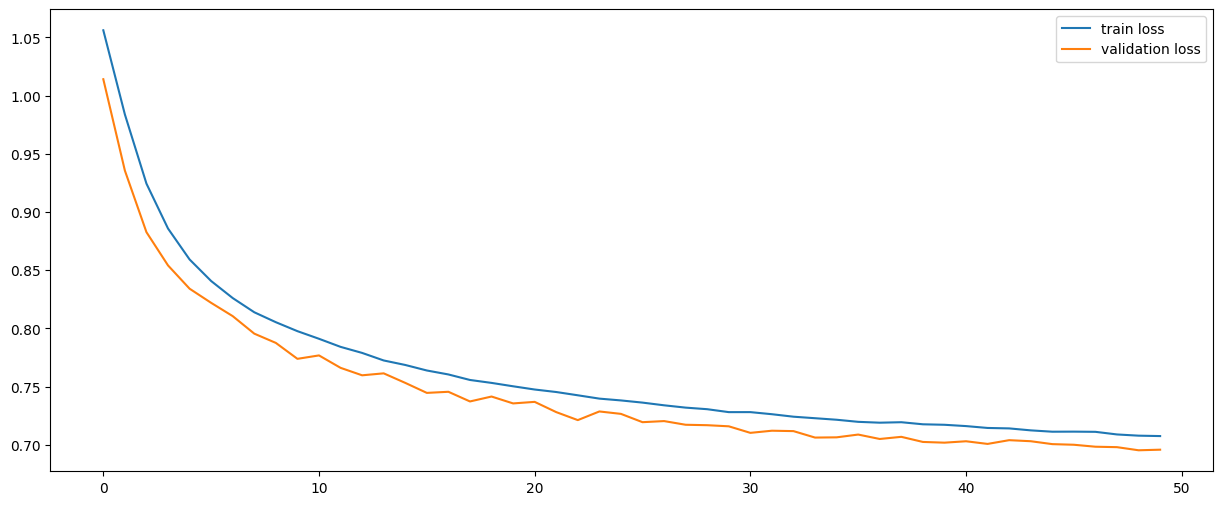

In [21]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [22]:
state = torch.load('./best_val_model_pytorch.pt')
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.8540


In [23]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [24]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.8540051183866723
              precision    recall  f1-score   support

           0     0.7175    0.6692    0.6925    121898
           1     0.8910    0.9098    0.9003    198500
           2     0.8932    0.9110    0.9020    200860

    accuracy                         0.8540    521258
   macro avg     0.8339    0.8300    0.8316    521258
weighted avg     0.8513    0.8540    0.8524    521258



In [25]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100   Count  Percent
0           0  219158    22.81
1           1  369880    38.50
2           2  371667    38.69


In [26]:
from models.mlp import MLP

mlp_model = MLP()
mlp_model.to(device)

MLP(
  (linear1): Linear(in_features=4000, out_features=128, bias=True)
  (leakyReLU): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=128, out_features=3, bias=True)
)

In [27]:
mlp_train_losses, mlp_val_losses = batch_gd(mlp_model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:16<13:18, 16.30s/it]

model saved
Epoch 1/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.295955, Best Val Epoch: 0


  4%|▍         | 2/50 [00:32<13:09, 16.44s/it]

Epoch 2/50, Train Loss: 1.0957,           Validation Loss: 1.0956, Duration: 0:00:16.545486, Best Val Epoch: 0


  6%|▌         | 3/50 [00:49<13:03, 16.66s/it]

Epoch 3/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.924035, Best Val Epoch: 0


  8%|▊         | 4/50 [01:05<12:34, 16.39s/it]

Epoch 4/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:15.978070, Best Val Epoch: 0


 10%|█         | 5/50 [01:22<12:16, 16.37s/it]

Epoch 5/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.330751, Best Val Epoch: 0


 12%|█▏        | 6/50 [01:38<11:59, 16.36s/it]

Epoch 6/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.324500, Best Val Epoch: 0


 14%|█▍        | 7/50 [01:59<12:43, 17.77s/it]

Epoch 7/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.674307, Best Val Epoch: 0


 16%|█▌        | 8/50 [02:15<12:09, 17.36s/it]

Epoch 8/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.480193, Best Val Epoch: 0


 18%|█▊        | 9/50 [02:36<12:31, 18.33s/it]

Epoch 9/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.456432, Best Val Epoch: 0


 20%|██        | 10/50 [02:52<11:48, 17.72s/it]

Epoch 10/50, Train Loss: 1.0957,           Validation Loss: 1.0956, Duration: 0:00:16.345615, Best Val Epoch: 0


 22%|██▏       | 11/50 [03:08<11:17, 17.37s/it]

Epoch 11/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.589776, Best Val Epoch: 0


 24%|██▍       | 12/50 [03:24<10:33, 16.68s/it]

Epoch 12/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:15.100062, Best Val Epoch: 0


 26%|██▌       | 13/50 [03:40<10:13, 16.59s/it]

Epoch 13/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.366806, Best Val Epoch: 0


 28%|██▊       | 14/50 [04:00<10:40, 17.78s/it]

Epoch 14/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.542768, Best Val Epoch: 0


 30%|███       | 15/50 [04:21<10:51, 18.61s/it]

Epoch 15/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.515669, Best Val Epoch: 0


 32%|███▏      | 16/50 [04:37<10:10, 17.96s/it]

Epoch 16/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.445068, Best Val Epoch: 0


 34%|███▍      | 17/50 [04:58<10:18, 18.74s/it]

Epoch 17/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.565767, Best Val Epoch: 0


 36%|███▌      | 18/50 [05:14<09:36, 18.02s/it]

Epoch 18/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.357183, Best Val Epoch: 0


 38%|███▊      | 19/50 [05:35<09:43, 18.81s/it]

Epoch 19/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.634753, Best Val Epoch: 0


 40%|████      | 20/50 [05:56<09:41, 19.38s/it]

Epoch 20/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.694914, Best Val Epoch: 0


 42%|████▏     | 21/50 [06:12<08:54, 18.43s/it]

Epoch 21/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.213408, Best Val Epoch: 0


 44%|████▍     | 22/50 [06:33<08:55, 19.13s/it]

Epoch 22/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.767625, Best Val Epoch: 0


 46%|████▌     | 23/50 [06:54<08:50, 19.66s/it]

Epoch 23/50, Train Loss: 1.0957,           Validation Loss: 1.0956, Duration: 0:00:20.893735, Best Val Epoch: 0


 48%|████▊     | 24/50 [07:10<08:07, 18.76s/it]

Epoch 24/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.660399, Best Val Epoch: 0


 50%|█████     | 25/50 [07:31<08:04, 19.36s/it]

Epoch 25/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.762547, Best Val Epoch: 0


 52%|█████▏    | 26/50 [07:51<07:51, 19.66s/it]

Epoch 26/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.352855, Best Val Epoch: 0


 54%|█████▍    | 27/50 [08:12<07:39, 19.99s/it]

Epoch 27/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.751365, Best Val Epoch: 0


 56%|█████▌    | 28/50 [08:29<06:58, 19.01s/it]

Epoch 28/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.718394, Best Val Epoch: 0


 58%|█████▊    | 29/50 [08:48<06:42, 19.15s/it]

Epoch 29/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:19.487660, Best Val Epoch: 0


 60%|██████    | 30/50 [09:05<06:08, 18.45s/it]

Epoch 30/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.813170, Best Val Epoch: 0


 62%|██████▏   | 31/50 [09:26<06:02, 19.06s/it]

Epoch 31/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.467044, Best Val Epoch: 0


 64%|██████▍   | 32/50 [09:46<05:51, 19.55s/it]

Epoch 32/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.708278, Best Val Epoch: 0


 66%|██████▌   | 33/50 [10:03<05:18, 18.73s/it]

Epoch 33/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.802747, Best Val Epoch: 0


 68%|██████▊   | 34/50 [10:24<05:09, 19.32s/it]

Epoch 34/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.699241, Best Val Epoch: 0


 70%|███████   | 35/50 [10:40<04:37, 18.48s/it]

Epoch 35/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.538821, Best Val Epoch: 0


 72%|███████▏  | 36/50 [11:01<04:27, 19.08s/it]

Epoch 36/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.454049, Best Val Epoch: 0


 74%|███████▍  | 37/50 [11:21<04:13, 19.49s/it]

Epoch 37/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.468557, Best Val Epoch: 0


 76%|███████▌  | 38/50 [11:38<03:43, 18.59s/it]

Epoch 38/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.488690, Best Val Epoch: 0


 78%|███████▊  | 39/50 [11:54<03:17, 17.98s/it]

Epoch 39/50, Train Loss: 1.0957,           Validation Loss: 1.0956, Duration: 0:00:16.560922, Best Val Epoch: 0


 80%|████████  | 40/50 [12:15<03:07, 18.80s/it]

Epoch 40/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.698211, Best Val Epoch: 0


 82%|████████▏ | 41/50 [12:36<02:53, 19.32s/it]

Epoch 41/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.544949, Best Val Epoch: 0


 84%|████████▍ | 42/50 [12:52<02:28, 18.54s/it]

Epoch 42/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:16.714225, Best Val Epoch: 0


 86%|████████▌ | 43/50 [13:13<02:14, 19.24s/it]

Epoch 43/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.878467, Best Val Epoch: 0


 88%|████████▊ | 44/50 [13:34<01:58, 19.77s/it]

Epoch 44/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.991403, Best Val Epoch: 0


 90%|█████████ | 45/50 [13:54<01:39, 19.94s/it]

Epoch 45/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.341780, Best Val Epoch: 0


 92%|█████████▏| 46/50 [14:15<01:20, 20.19s/it]

Epoch 46/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.772900, Best Val Epoch: 0


 94%|█████████▍| 47/50 [14:36<01:01, 20.43s/it]

Epoch 47/50, Train Loss: 1.0957,           Validation Loss: 1.0956, Duration: 0:00:20.983269, Best Val Epoch: 0


 96%|█████████▌| 48/50 [14:57<00:40, 20.39s/it]

Epoch 48/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.284986, Best Val Epoch: 0


 98%|█████████▊| 49/50 [15:17<00:20, 20.46s/it]

Epoch 49/50, Train Loss: 1.0957,           Validation Loss: 1.0956, Duration: 0:00:20.622448, Best Val Epoch: 0


100%|██████████| 50/50 [15:38<00:00, 18.76s/it]

Epoch 50/50, Train Loss: 1.0958,           Validation Loss: 1.0956, Duration: 0:00:20.515782, Best Val Epoch: 0


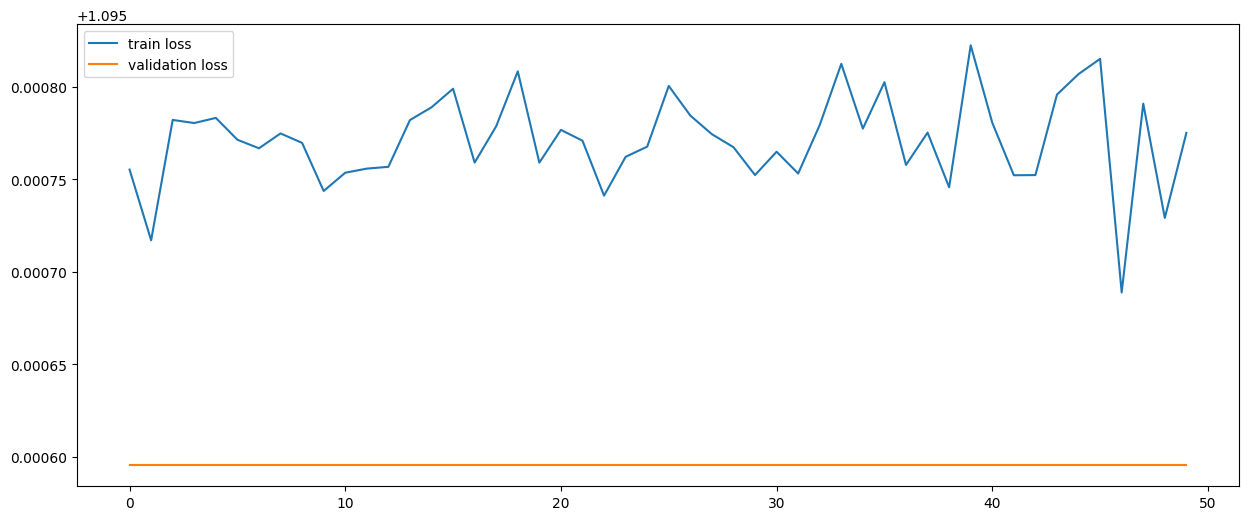

In [28]:
plt.figure(figsize=(15,6))
plt.plot(mlp_train_losses, label='train loss')
plt.plot(mlp_val_losses, label='validation loss')
plt.legend()

In [29]:
state = torch.load('./best_val_model_pytorch.pt')
model = MLP()
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.3641


In [30]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [31]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.36408649843263796
              precision    recall  f1-score   support

           0     0.2348    0.1415    0.1766    121898
           1     0.3834    0.6148    0.4723    198500
           2     0.3899    0.2515    0.3057    200860

    accuracy                         0.3641    521258
   macro avg     0.3360    0.3359    0.3182    521258
weighted avg     0.3512    0.3641    0.3389    521258

